In [ ]:
!mkdir -p ~/.Kaggle         #importing dataset to
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats #Api command of dataset from kaggle

100% 1.06G/1.06G [00:08<00:00, 102MB/s] 
100% 1.06G/1.06G [00:08<00:00, 128MB/s]


In [ ]:
import zipfile         #for unzip the dataset file
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf     #importing important libaries
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators = it send data to the model in bitches
#generators is useful to process large amount of data

#generator1 for train data
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)
#generator2 for vaidation data
valiidation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize: it is perform to set all images in the range of 0-1 pixels
def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

train_ds = train_ds.map(process)
valiidation_ds = valiidation_ds.map(process)

In [ ]:
#create CNN model

model = Sequential()

#1st Layer 32 filters
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#2nd Layer 64 filters
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#3rd Layer 128 filters
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation= 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
#compilation of model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#execution of cnn model
history = model.fit(train_ds,epochs=10,validation_data=valiidation_ds)

Epoch 1/10
625/625 [==============================] - 77s 107ms/step - loss: 1.6275 - accuracy: 0.5962 - val_loss: 0.6682 - val_accuracy: 0.6498
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6016 - accuracy: 0.6948 - val_loss: 0.5372 - val_accuracy: 0.7326
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5072 - accuracy: 0.7584 - val_loss: 0.5514 - val_accuracy: 0.7168
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4295 - accuracy: 0.8036 - val_loss: 0.4551 - val_accuracy: 0.7858
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3776 - accuracy: 0.8332 - val_loss: 0.4568 - val_accuracy: 0.7872
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3212 - accuracy: 0.8601 - val_loss: 0.8380 - val_accuracy: 0.7114
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2515 - accuracy: 0.8952 - val_loss: 0.5331 - val_ac

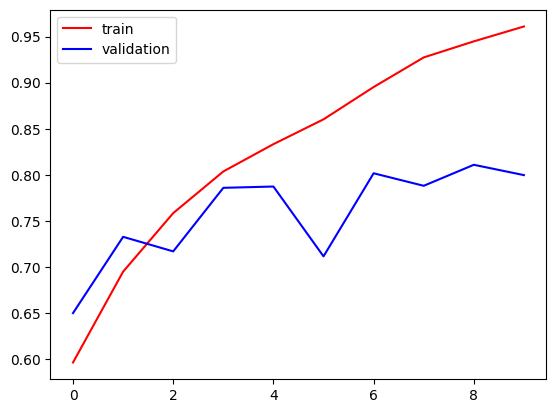

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

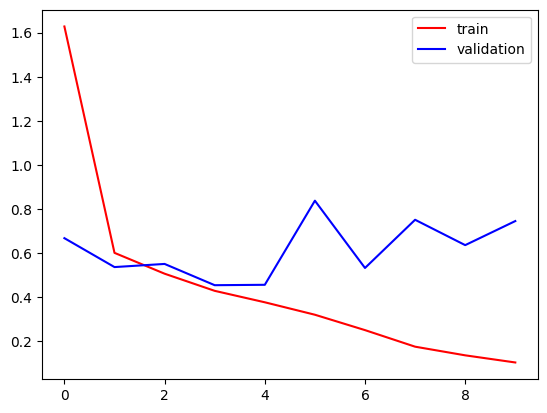

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

To reduce this overfitting we can use these ways:
1) ADD MORE DATA
2) DATA AUGMENTATION
3) L1/L2 REGULARIZER
4) DROPOUT
5) BATCH NORM
6) REDUCE COMPLEXITY

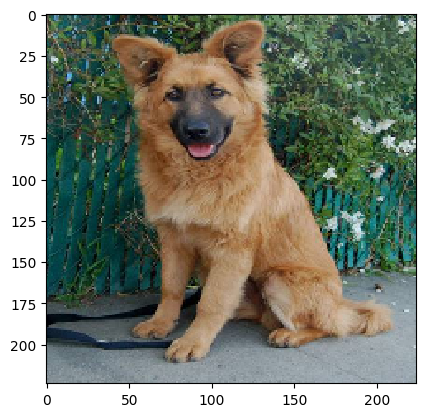

In [ ]:
from tensorflow.keras.preprocessing import image
path ='/content/dogs_vs_cats/test/dogs/dog.10014.jpg'
img = image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
import numpy as np
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [ ]:
import cv2
img_array = cv2.resize(img_array,(256,256))

In [ ]:
img_array=img_array.reshape((1,256,256,3))

In [ ]:
a = model.predict(img_array)
if a==[[0]]:
    print('cat')
else:
    print('dog')

1/1 [==============================] - 0s 17ms/step
dog
